# K-Means Clusters Forecasting with Explanatory Variables

In [1]:
import pandas as pd
from prophet import Prophet
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import logging
import itertools
from itertools import product
%matplotlib inline

In [2]:
logging.getLogger().setLevel(logging.ERROR)

In [3]:
def calculate_smape(y_true, y_pred):
    y_true = np.array(y_true)
    y_pred = np.array(y_pred)
    
    numerator = np.abs(y_true - y_pred)
    denominator = np.abs(y_true) + np.abs(y_pred)
    
    smape = 100 * np.mean(numerator / (denominator + 1e-10 ))
    return smape

In [4]:
df = pd.read_csv('../dataset/clustered_data.csv')

In [5]:
total_df = df.groupby(['Date', 'K-Means_Cluster'], as_index=False)['UnitsSold'].sum()

In [6]:
total_df['lag_1'] = total_df['UnitsSold'].shift(1)
total_df['lag_7'] = total_df['UnitsSold'].shift(7)
total_df['lag_14'] = total_df['UnitsSold'].shift(14)

total_df['Rolling_Mean_7'] = total_df['UnitsSold'].rolling(window=7).mean()
total_df['Rolling_Std_7'] = total_df['UnitsSold'].rolling(window=7).std()

In [7]:
total_df['lag_1'] = total_df['lag_1'].ffill()
total_df['lag_7'] = total_df['lag_7'].ffill()
total_df['lag_14'] = total_df['lag_14'].ffill()

total_df['Rolling_Mean_7'] = total_df['Rolling_Mean_7'].fillna(total_df['UnitsSold'].expanding().mean())

total_df['Rolling_Std_7'] = total_df['Rolling_Std_7'].fillna(total_df['UnitsSold'].expanding().std().fillna(0))


In [8]:
total_df = total_df.rename(columns={'Date': 'date', 'UnitsSold': "y"})

In [9]:
explanatory_df = pd.read_csv('../explanatory_variables/combined_explanatory_variables.csv')

In [10]:
total_df = total_df.merge(explanatory_df, on='date', how='left')

In [11]:
total_df = total_df.rename(columns={'date': 'ds'})
total_df['ds'] = pd.to_datetime(total_df['ds'])

In [12]:
regressors = ['lag_7',
       'Rolling_Mean_7',
       'lag_14',
       'Rolling_Std_7',
       'lag_1',
       'is_Thursday',
       'is_Tuesday']

total_df[regressors] = total_df[regressors].ffill().bfill()

In [13]:
n = len(total_df)
train_end = int(n * 0.6)
val_end = int(n * 0.8)

train_data = total_df.iloc[:train_end]
validation_data = total_df.iloc[train_end:val_end]
test_data = total_df.iloc[val_end:]

In [14]:
clip_threshold = np.percentile(total_df['y'], 99)

# Tuning

In [15]:
param_grid = {
    "changepoint_prior_scale": [0.01, 0.05, 0.1, 0.2, 0.5],
    "seasonality_prior_scale": [0.05, 0.1, 0.5, 1, 5],
    "fourier_order": [3, 5, 10]
}

best_smape = float("inf")
best_params = None
best_model = None

In [16]:
train_data = train_data.replace([np.inf, -np.inf], np.nan).dropna()
validation_data = validation_data.replace([np.inf, -np.inf], np.nan).dropna()
test_data = test_data.replace([np.inf, -np.inf], np.nan).dropna()

In [17]:
clusters = total_df['K-Means_Cluster'].unique()


🔍 Processing Cluster 0


23:50:13 - cmdstanpy - INFO - Chain [1] start processing
23:50:13 - cmdstanpy - INFO - Chain [1] done processing
23:50:13 - cmdstanpy - INFO - Chain [1] start processing
23:50:13 - cmdstanpy - INFO - Chain [1] done processing
23:50:14 - cmdstanpy - INFO - Chain [1] start processing
23:50:14 - cmdstanpy - INFO - Chain [1] done processing
23:50:14 - cmdstanpy - INFO - Chain [1] start processing
23:50:14 - cmdstanpy - INFO - Chain [1] done processing
23:50:14 - cmdstanpy - INFO - Chain [1] start processing
23:50:14 - cmdstanpy - INFO - Chain [1] done processing
23:50:15 - cmdstanpy - INFO - Chain [1] start processing
23:50:15 - cmdstanpy - INFO - Chain [1] done processing
23:50:15 - cmdstanpy - INFO - Chain [1] start processing
23:50:15 - cmdstanpy - INFO - Chain [1] done processing
23:50:15 - cmdstanpy - INFO - Chain [1] start processing
23:50:15 - cmdstanpy - INFO - Chain [1] done processing
23:50:15 - cmdstanpy - INFO - Chain [1] start processing
23:50:15 - cmdstanpy - INFO - Chain [1]


✅ Best Parameters for Cluster 0: changepoint_prior_scale=0.01, seasonality_prior_scale=1, fourier_order=3
📉 Best SMAPE on Validation Set: 22.92%


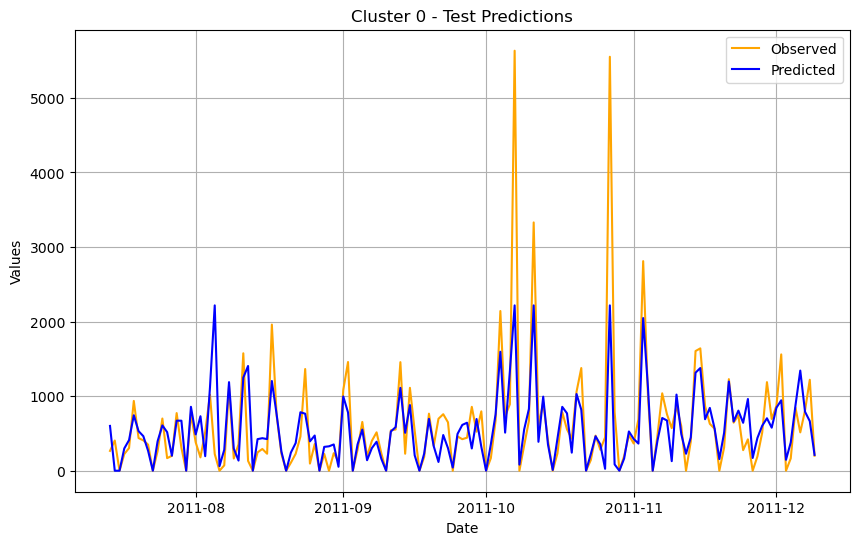

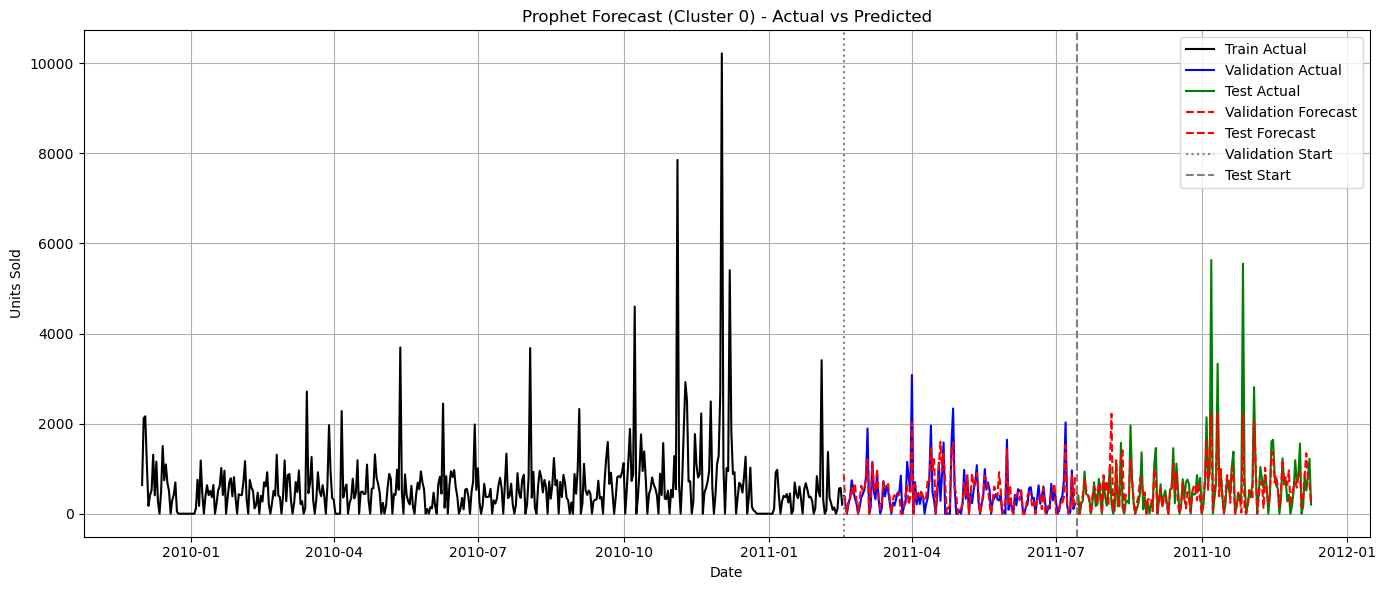

23:50:35 - cmdstanpy - INFO - Chain [1] start processing
23:50:35 - cmdstanpy - INFO - Chain [1] done processing



🔍 Processing Cluster 1


23:50:35 - cmdstanpy - INFO - Chain [1] start processing
23:50:35 - cmdstanpy - INFO - Chain [1] done processing
23:50:35 - cmdstanpy - INFO - Chain [1] start processing
23:50:35 - cmdstanpy - INFO - Chain [1] done processing
23:50:36 - cmdstanpy - INFO - Chain [1] start processing
23:50:36 - cmdstanpy - INFO - Chain [1] done processing
23:50:36 - cmdstanpy - INFO - Chain [1] start processing
23:50:36 - cmdstanpy - INFO - Chain [1] done processing
23:50:36 - cmdstanpy - INFO - Chain [1] start processing
23:50:36 - cmdstanpy - INFO - Chain [1] done processing
23:50:37 - cmdstanpy - INFO - Chain [1] start processing
23:50:37 - cmdstanpy - INFO - Chain [1] done processing
23:50:37 - cmdstanpy - INFO - Chain [1] start processing
23:50:37 - cmdstanpy - INFO - Chain [1] done processing
23:50:37 - cmdstanpy - INFO - Chain [1] start processing
23:50:37 - cmdstanpy - INFO - Chain [1] done processing
23:50:37 - cmdstanpy - INFO - Chain [1] start processing
23:50:37 - cmdstanpy - INFO - Chain [1]


✅ Best Parameters for Cluster 1: changepoint_prior_scale=0.01, seasonality_prior_scale=0.5, fourier_order=3
📉 Best SMAPE on Validation Set: 28.97%


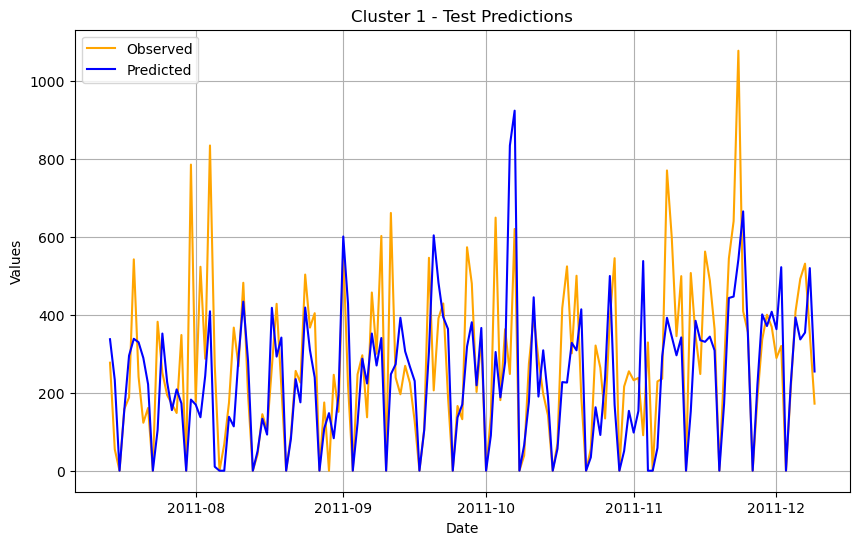

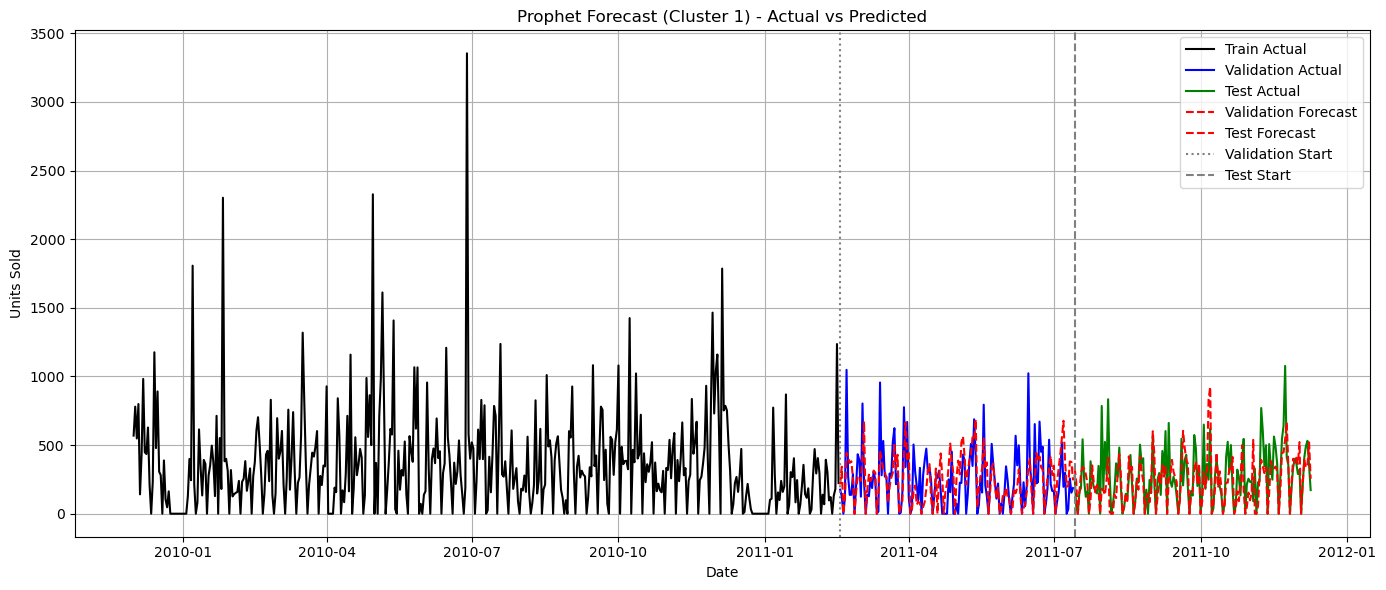

23:50:56 - cmdstanpy - INFO - Chain [1] start processing



🔍 Processing Cluster 2


23:50:56 - cmdstanpy - INFO - Chain [1] done processing
23:50:56 - cmdstanpy - INFO - Chain [1] start processing
23:50:56 - cmdstanpy - INFO - Chain [1] done processing
23:50:57 - cmdstanpy - INFO - Chain [1] start processing
23:50:57 - cmdstanpy - INFO - Chain [1] done processing
23:50:57 - cmdstanpy - INFO - Chain [1] start processing
23:50:57 - cmdstanpy - INFO - Chain [1] done processing
23:50:57 - cmdstanpy - INFO - Chain [1] start processing
23:50:57 - cmdstanpy - INFO - Chain [1] done processing
23:50:57 - cmdstanpy - INFO - Chain [1] start processing
23:50:58 - cmdstanpy - INFO - Chain [1] done processing
23:50:58 - cmdstanpy - INFO - Chain [1] start processing
23:50:58 - cmdstanpy - INFO - Chain [1] done processing
23:50:58 - cmdstanpy - INFO - Chain [1] start processing
23:50:58 - cmdstanpy - INFO - Chain [1] done processing
23:50:58 - cmdstanpy - INFO - Chain [1] start processing
23:50:58 - cmdstanpy - INFO - Chain [1] done processing
23:50:58 - cmdstanpy - INFO - Chain [1] 


✅ Best Parameters for Cluster 2: changepoint_prior_scale=0.01, seasonality_prior_scale=5, fourier_order=3
📉 Best SMAPE on Validation Set: 36.23%


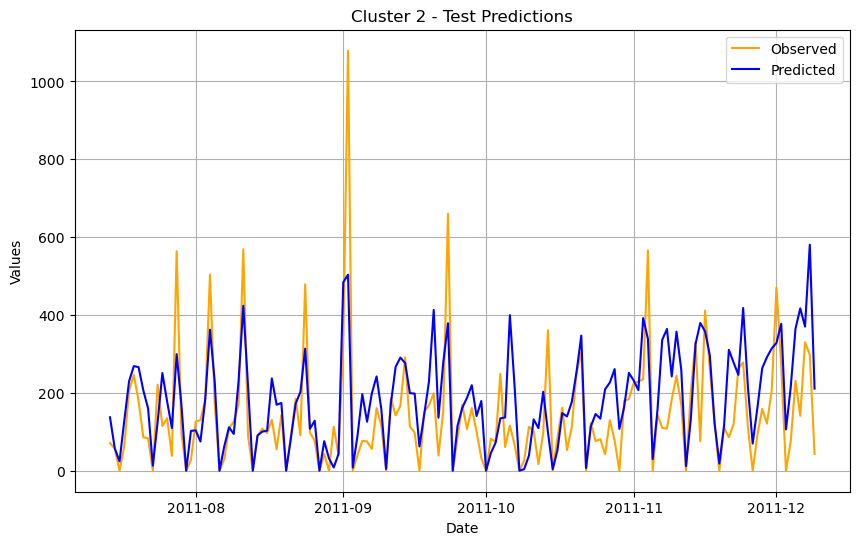

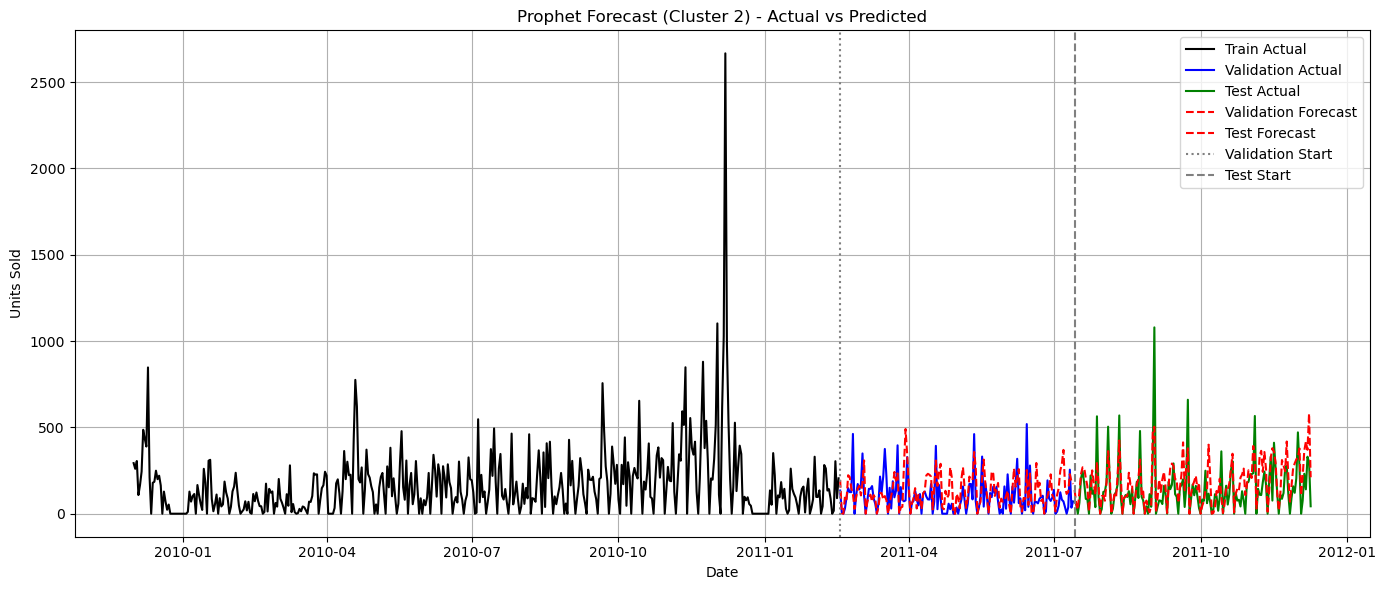

23:51:16 - cmdstanpy - INFO - Chain [1] start processing
23:51:16 - cmdstanpy - INFO - Chain [1] done processing



🔍 Processing Cluster 3


23:51:16 - cmdstanpy - INFO - Chain [1] start processing
23:51:16 - cmdstanpy - INFO - Chain [1] done processing
23:51:17 - cmdstanpy - INFO - Chain [1] start processing
23:51:17 - cmdstanpy - INFO - Chain [1] done processing
23:51:17 - cmdstanpy - INFO - Chain [1] start processing
23:51:17 - cmdstanpy - INFO - Chain [1] done processing
23:51:17 - cmdstanpy - INFO - Chain [1] start processing
23:51:17 - cmdstanpy - INFO - Chain [1] done processing
23:51:17 - cmdstanpy - INFO - Chain [1] start processing
23:51:17 - cmdstanpy - INFO - Chain [1] done processing
23:51:17 - cmdstanpy - INFO - Chain [1] start processing
23:51:18 - cmdstanpy - INFO - Chain [1] done processing
23:51:18 - cmdstanpy - INFO - Chain [1] start processing
23:51:18 - cmdstanpy - INFO - Chain [1] done processing
23:51:18 - cmdstanpy - INFO - Chain [1] start processing
23:51:18 - cmdstanpy - INFO - Chain [1] done processing
23:51:18 - cmdstanpy - INFO - Chain [1] start processing
23:51:18 - cmdstanpy - INFO - Chain [1]


✅ Best Parameters for Cluster 3: changepoint_prior_scale=0.01, seasonality_prior_scale=0.05, fourier_order=3
📉 Best SMAPE on Validation Set: 25.90%


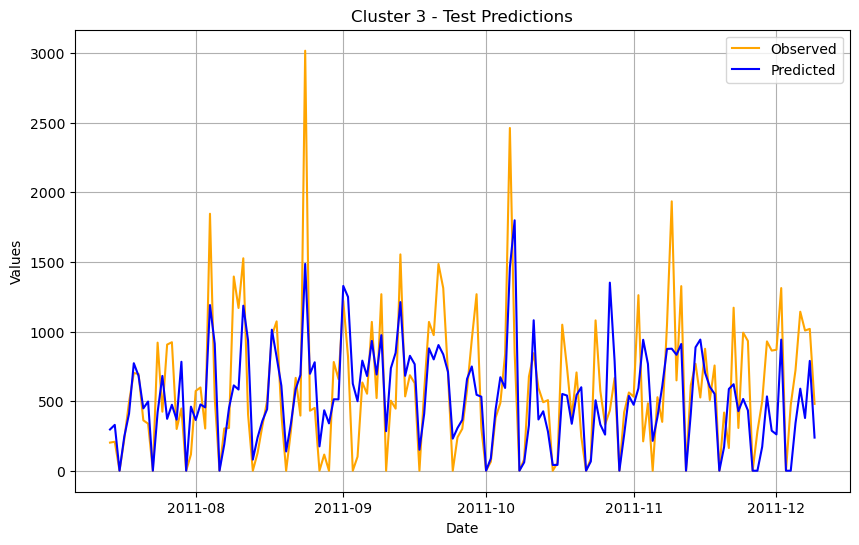

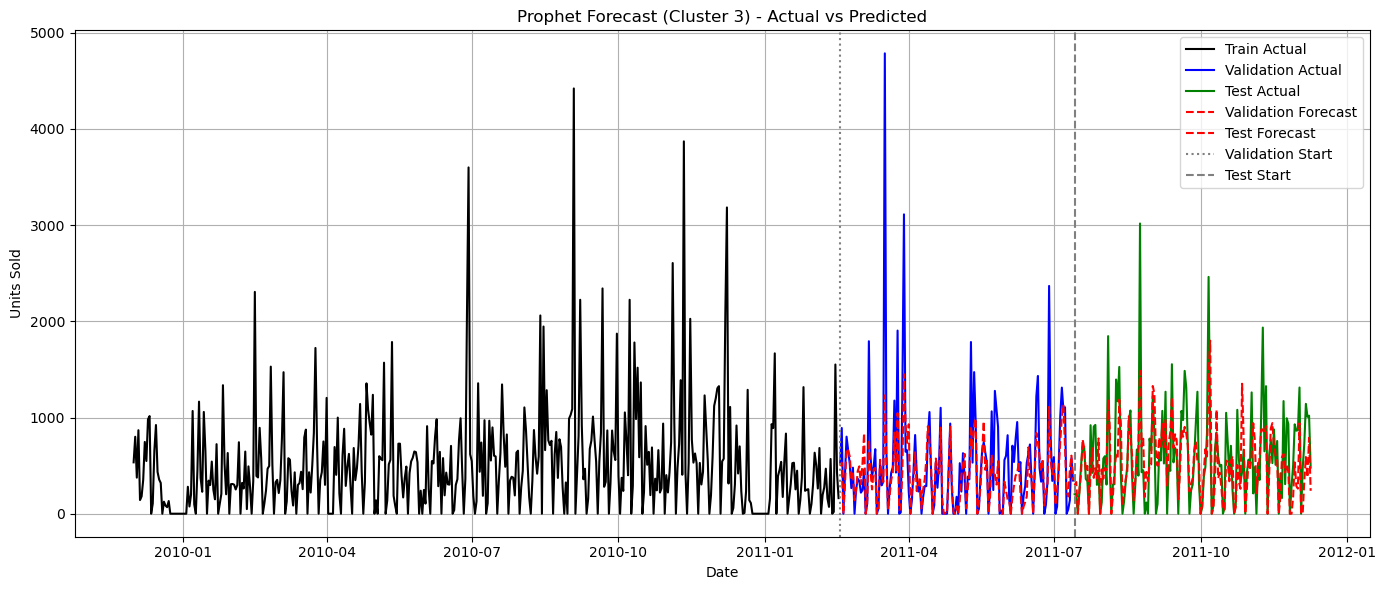

23:51:41 - cmdstanpy - INFO - Chain [1] start processing



🔍 Processing Cluster 4


23:51:42 - cmdstanpy - INFO - Chain [1] done processing
23:51:42 - cmdstanpy - INFO - Chain [1] start processing
23:51:42 - cmdstanpy - INFO - Chain [1] done processing
23:51:43 - cmdstanpy - INFO - Chain [1] start processing
23:51:43 - cmdstanpy - INFO - Chain [1] done processing
23:51:43 - cmdstanpy - INFO - Chain [1] start processing
23:51:43 - cmdstanpy - INFO - Chain [1] done processing
23:51:44 - cmdstanpy - INFO - Chain [1] start processing
23:51:44 - cmdstanpy - INFO - Chain [1] done processing
23:51:44 - cmdstanpy - INFO - Chain [1] start processing
23:51:45 - cmdstanpy - INFO - Chain [1] done processing
23:51:45 - cmdstanpy - INFO - Chain [1] start processing
23:51:45 - cmdstanpy - INFO - Chain [1] done processing
23:51:46 - cmdstanpy - INFO - Chain [1] start processing
23:51:46 - cmdstanpy - INFO - Chain [1] done processing
23:51:47 - cmdstanpy - INFO - Chain [1] start processing
23:51:47 - cmdstanpy - INFO - Chain [1] done processing
23:51:47 - cmdstanpy - INFO - Chain [1] 


✅ Best Parameters for Cluster 4: changepoint_prior_scale=0.5, seasonality_prior_scale=5, fourier_order=3
📉 Best SMAPE on Validation Set: 34.29%


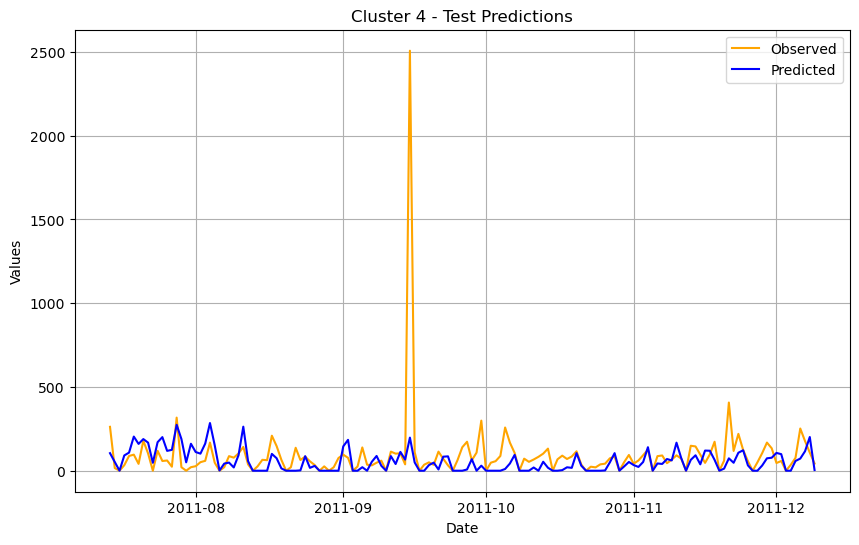

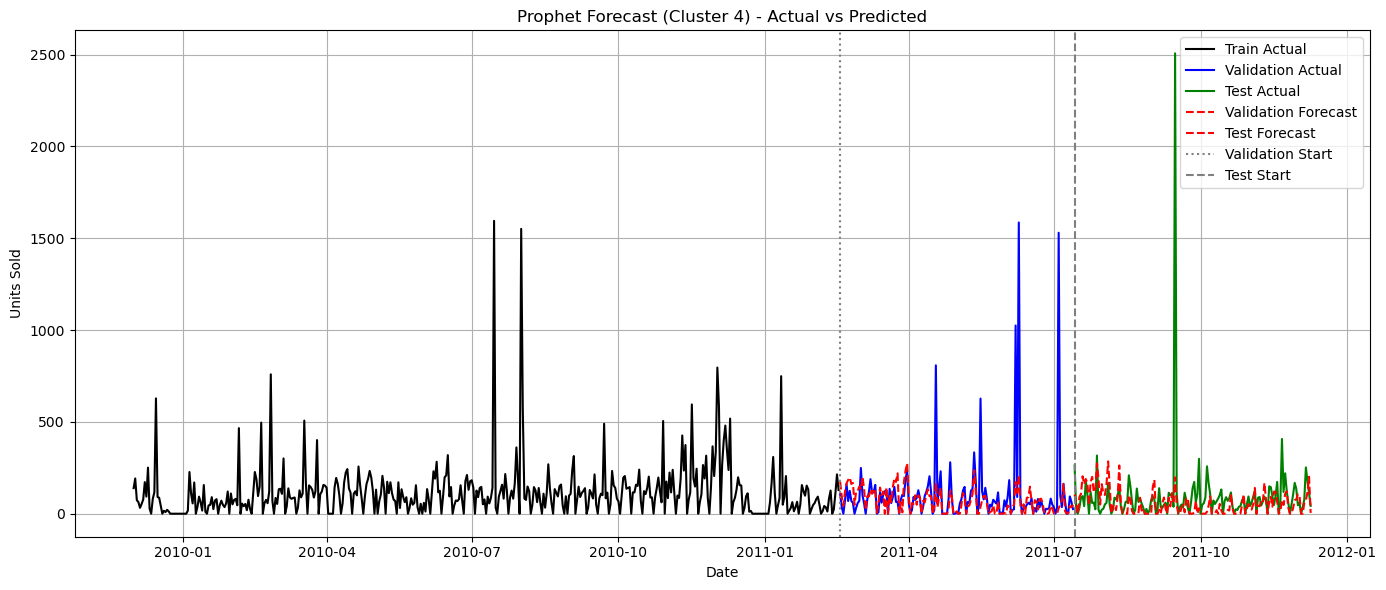

23:52:18 - cmdstanpy - INFO - Chain [1] start processing



🔍 Processing Cluster 5


23:52:18 - cmdstanpy - INFO - Chain [1] done processing
23:52:18 - cmdstanpy - INFO - Chain [1] start processing
23:52:19 - cmdstanpy - INFO - Chain [1] done processing
23:52:19 - cmdstanpy - INFO - Chain [1] start processing
23:52:19 - cmdstanpy - INFO - Chain [1] done processing
23:52:19 - cmdstanpy - INFO - Chain [1] start processing
23:52:20 - cmdstanpy - INFO - Chain [1] done processing
23:52:20 - cmdstanpy - INFO - Chain [1] start processing
23:52:20 - cmdstanpy - INFO - Chain [1] done processing
23:52:20 - cmdstanpy - INFO - Chain [1] start processing
23:52:21 - cmdstanpy - INFO - Chain [1] done processing
23:52:21 - cmdstanpy - INFO - Chain [1] start processing
23:52:21 - cmdstanpy - INFO - Chain [1] done processing
23:52:21 - cmdstanpy - INFO - Chain [1] start processing
23:52:21 - cmdstanpy - INFO - Chain [1] done processing
23:52:21 - cmdstanpy - INFO - Chain [1] start processing
23:52:22 - cmdstanpy - INFO - Chain [1] done processing
23:52:22 - cmdstanpy - INFO - Chain [1] 


✅ Best Parameters for Cluster 5: changepoint_prior_scale=0.5, seasonality_prior_scale=0.05, fourier_order=3
📉 Best SMAPE on Validation Set: 35.05%


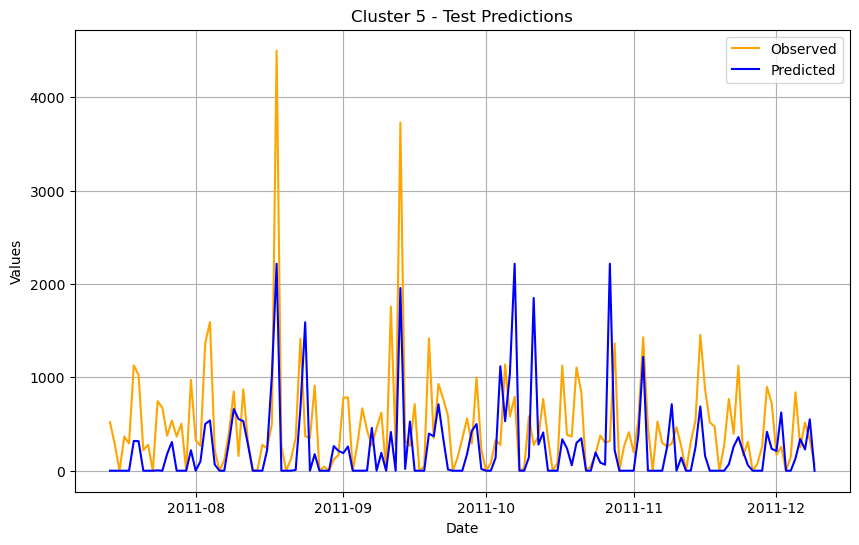

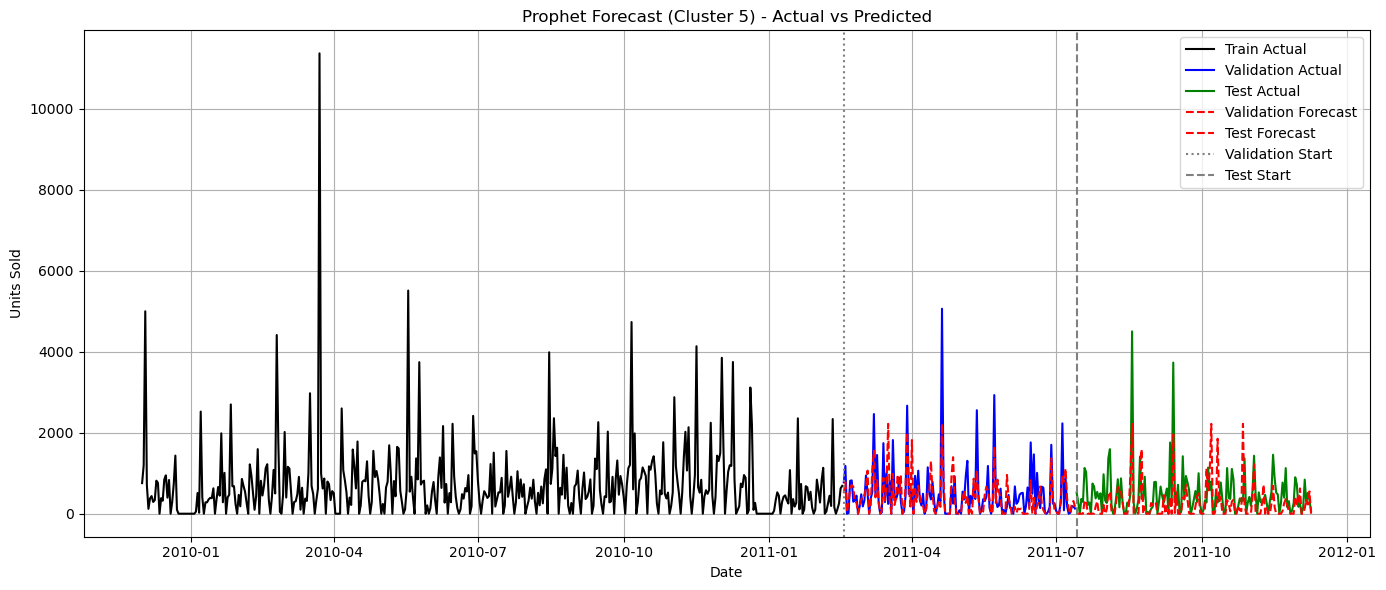


🔍 Processing Cluster 6


23:52:47 - cmdstanpy - INFO - Chain [1] start processing
23:52:47 - cmdstanpy - INFO - Chain [1] done processing
23:52:48 - cmdstanpy - INFO - Chain [1] start processing
23:52:48 - cmdstanpy - INFO - Chain [1] done processing
23:52:48 - cmdstanpy - INFO - Chain [1] start processing
23:52:48 - cmdstanpy - INFO - Chain [1] done processing
23:52:48 - cmdstanpy - INFO - Chain [1] start processing
23:52:48 - cmdstanpy - INFO - Chain [1] done processing
23:52:49 - cmdstanpy - INFO - Chain [1] start processing
23:52:49 - cmdstanpy - INFO - Chain [1] done processing
23:52:49 - cmdstanpy - INFO - Chain [1] start processing
23:52:49 - cmdstanpy - INFO - Chain [1] done processing
23:52:49 - cmdstanpy - INFO - Chain [1] start processing
23:52:49 - cmdstanpy - INFO - Chain [1] done processing
23:52:50 - cmdstanpy - INFO - Chain [1] start processing
23:52:50 - cmdstanpy - INFO - Chain [1] done processing
23:52:50 - cmdstanpy - INFO - Chain [1] start processing
23:52:50 - cmdstanpy - INFO - Chain [1]


✅ Best Parameters for Cluster 6: changepoint_prior_scale=0.01, seasonality_prior_scale=0.1, fourier_order=3
📉 Best SMAPE on Validation Set: 34.59%


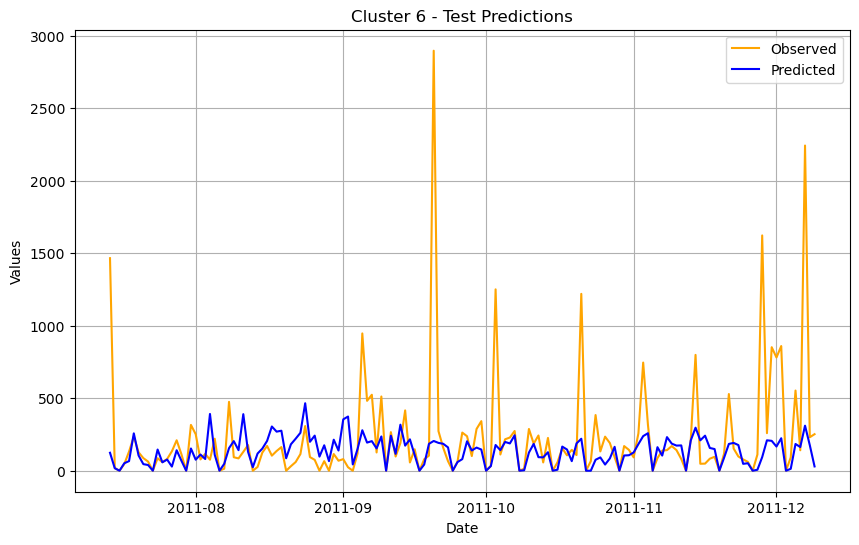

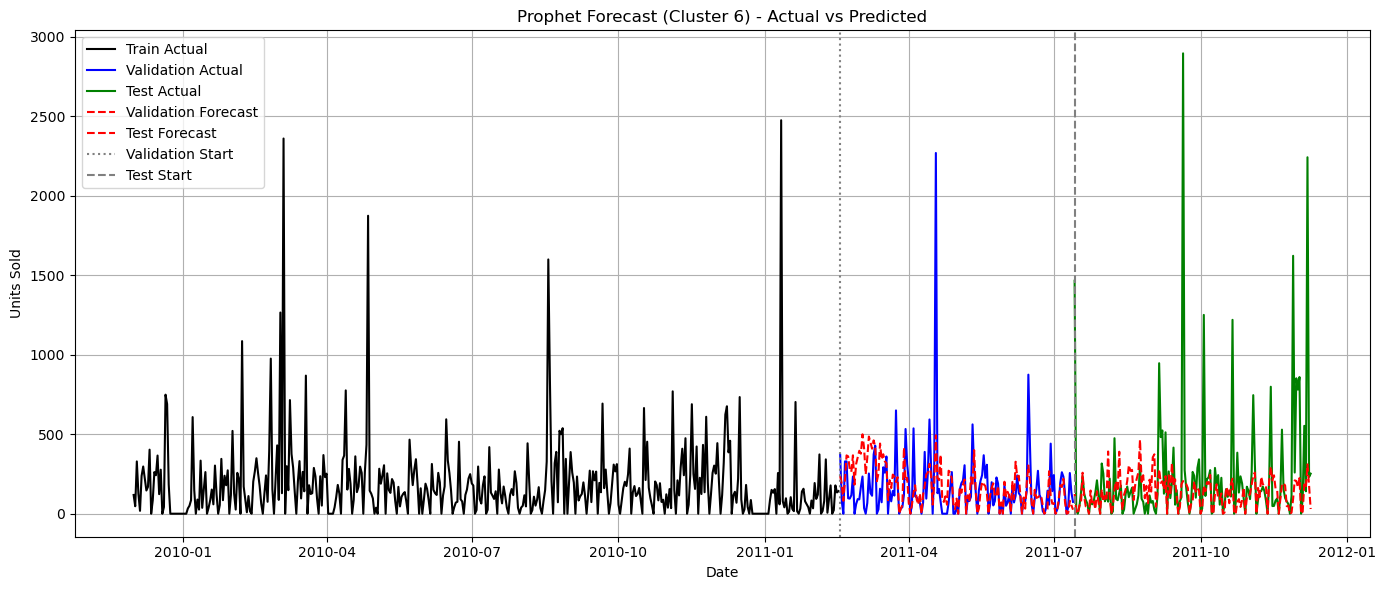

23:53:19 - cmdstanpy - INFO - Chain [1] start processing



🔍 Processing Cluster 7


23:53:19 - cmdstanpy - INFO - Chain [1] done processing
23:53:20 - cmdstanpy - INFO - Chain [1] start processing
23:53:20 - cmdstanpy - INFO - Chain [1] done processing
23:53:20 - cmdstanpy - INFO - Chain [1] start processing
23:53:20 - cmdstanpy - INFO - Chain [1] done processing
23:53:21 - cmdstanpy - INFO - Chain [1] start processing
23:53:21 - cmdstanpy - INFO - Chain [1] done processing
23:53:21 - cmdstanpy - INFO - Chain [1] start processing
23:53:21 - cmdstanpy - INFO - Chain [1] done processing
23:53:21 - cmdstanpy - INFO - Chain [1] start processing
23:53:21 - cmdstanpy - INFO - Chain [1] done processing
23:53:22 - cmdstanpy - INFO - Chain [1] start processing
23:53:22 - cmdstanpy - INFO - Chain [1] done processing
23:53:22 - cmdstanpy - INFO - Chain [1] start processing
23:53:22 - cmdstanpy - INFO - Chain [1] done processing
23:53:23 - cmdstanpy - INFO - Chain [1] start processing
23:53:23 - cmdstanpy - INFO - Chain [1] done processing
23:53:23 - cmdstanpy - INFO - Chain [1] 


✅ Best Parameters for Cluster 7: changepoint_prior_scale=0.05, seasonality_prior_scale=0.5, fourier_order=3
📉 Best SMAPE on Validation Set: 17.66%


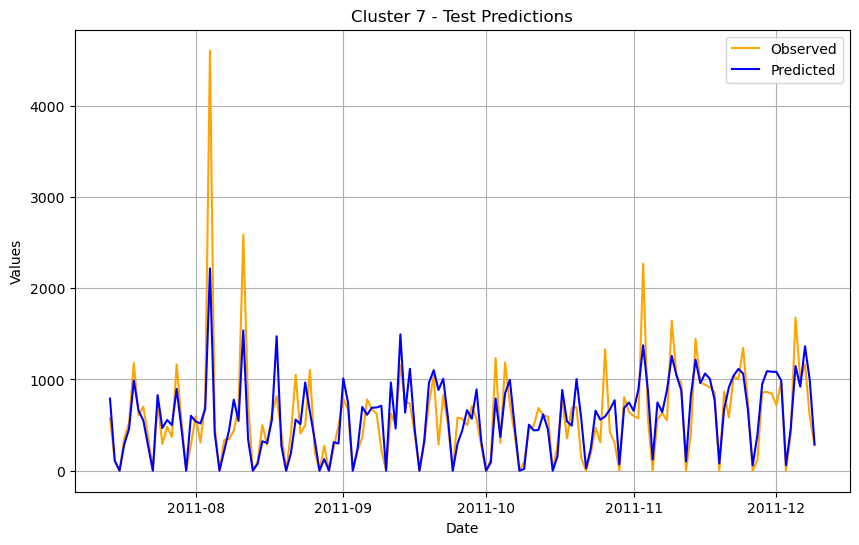

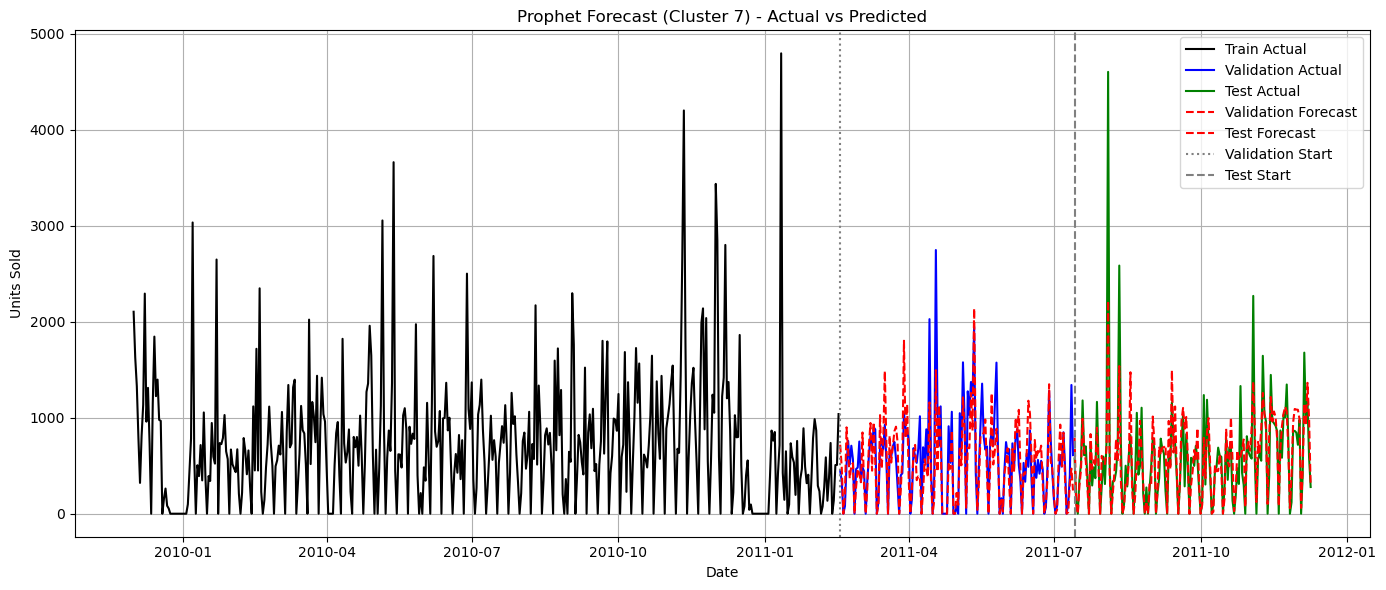


🔍 Processing Cluster 8


23:53:57 - cmdstanpy - INFO - Chain [1] start processing
23:53:57 - cmdstanpy - INFO - Chain [1] done processing
23:53:58 - cmdstanpy - INFO - Chain [1] start processing
23:53:58 - cmdstanpy - INFO - Chain [1] done processing
23:53:59 - cmdstanpy - INFO - Chain [1] start processing
23:53:59 - cmdstanpy - INFO - Chain [1] done processing
23:53:59 - cmdstanpy - INFO - Chain [1] start processing
23:53:59 - cmdstanpy - INFO - Chain [1] done processing
23:54:00 - cmdstanpy - INFO - Chain [1] start processing
23:54:00 - cmdstanpy - INFO - Chain [1] done processing
23:54:01 - cmdstanpy - INFO - Chain [1] start processing
23:54:01 - cmdstanpy - INFO - Chain [1] done processing
23:54:01 - cmdstanpy - INFO - Chain [1] start processing
23:54:01 - cmdstanpy - INFO - Chain [1] done processing
23:54:02 - cmdstanpy - INFO - Chain [1] start processing
23:54:02 - cmdstanpy - INFO - Chain [1] done processing
23:54:02 - cmdstanpy - INFO - Chain [1] start processing
23:54:02 - cmdstanpy - INFO - Chain [1]


✅ Best Parameters for Cluster 8: changepoint_prior_scale=0.01, seasonality_prior_scale=0.05, fourier_order=3
📉 Best SMAPE on Validation Set: 23.56%


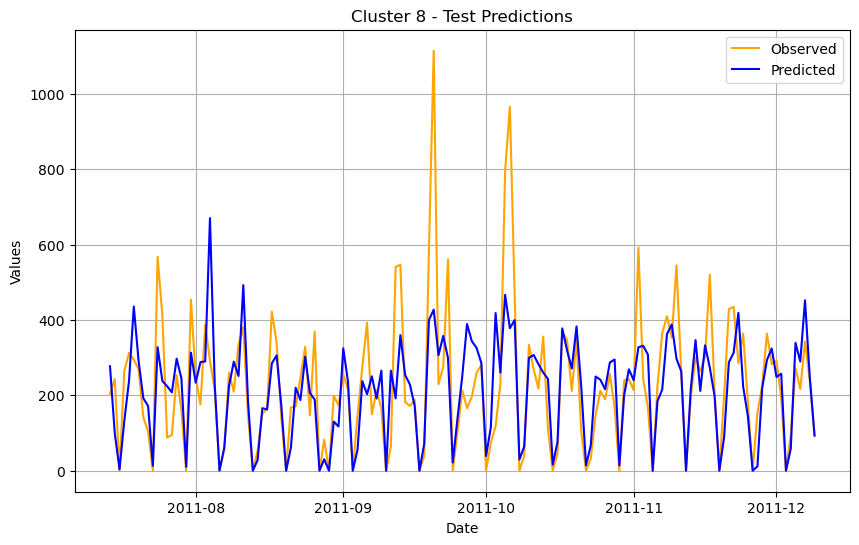

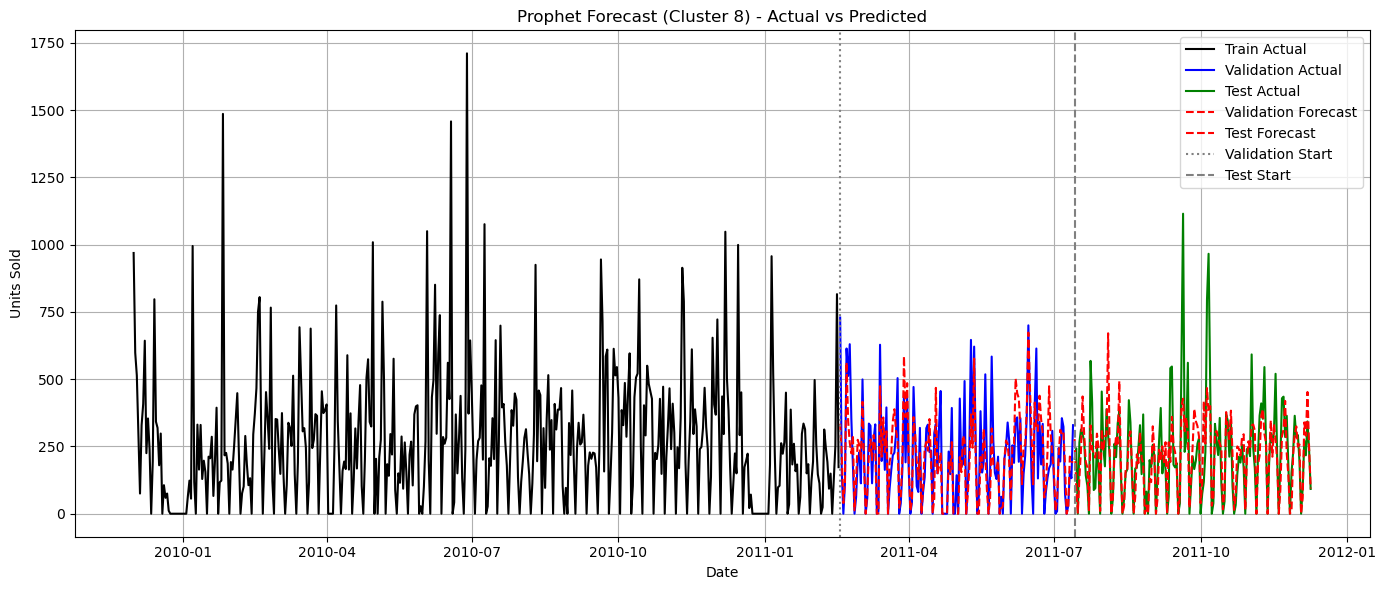


🔍 Processing Cluster 9


23:54:46 - cmdstanpy - INFO - Chain [1] start processing
23:54:46 - cmdstanpy - INFO - Chain [1] done processing
23:54:47 - cmdstanpy - INFO - Chain [1] start processing
23:54:47 - cmdstanpy - INFO - Chain [1] done processing
23:54:47 - cmdstanpy - INFO - Chain [1] start processing
23:54:47 - cmdstanpy - INFO - Chain [1] done processing
23:54:47 - cmdstanpy - INFO - Chain [1] start processing
23:54:48 - cmdstanpy - INFO - Chain [1] done processing
23:54:48 - cmdstanpy - INFO - Chain [1] start processing
23:54:48 - cmdstanpy - INFO - Chain [1] done processing
23:54:49 - cmdstanpy - INFO - Chain [1] start processing
23:54:49 - cmdstanpy - INFO - Chain [1] done processing
23:54:49 - cmdstanpy - INFO - Chain [1] start processing
23:54:49 - cmdstanpy - INFO - Chain [1] done processing
23:54:49 - cmdstanpy - INFO - Chain [1] start processing
23:54:50 - cmdstanpy - INFO - Chain [1] done processing
23:54:50 - cmdstanpy - INFO - Chain [1] start processing
23:54:50 - cmdstanpy - INFO - Chain [1]


✅ Best Parameters for Cluster 9: changepoint_prior_scale=0.01, seasonality_prior_scale=0.05, fourier_order=3
📉 Best SMAPE on Validation Set: 53.58%


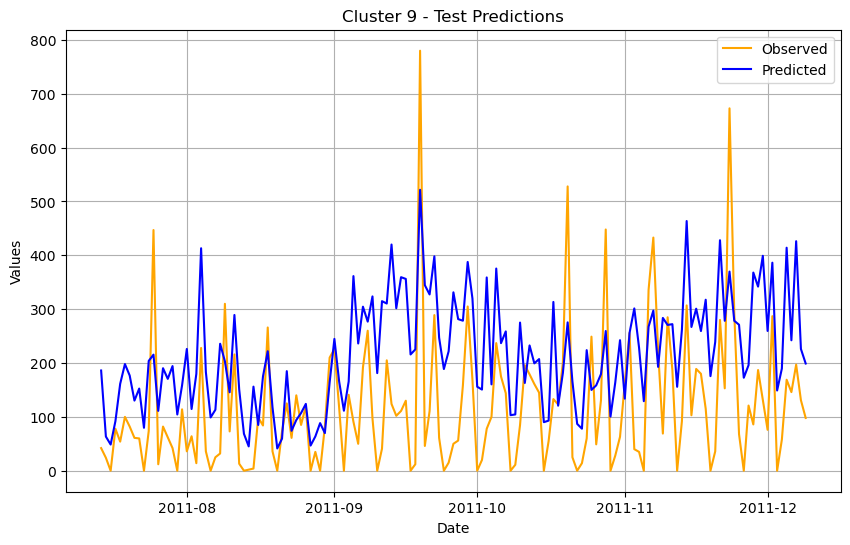

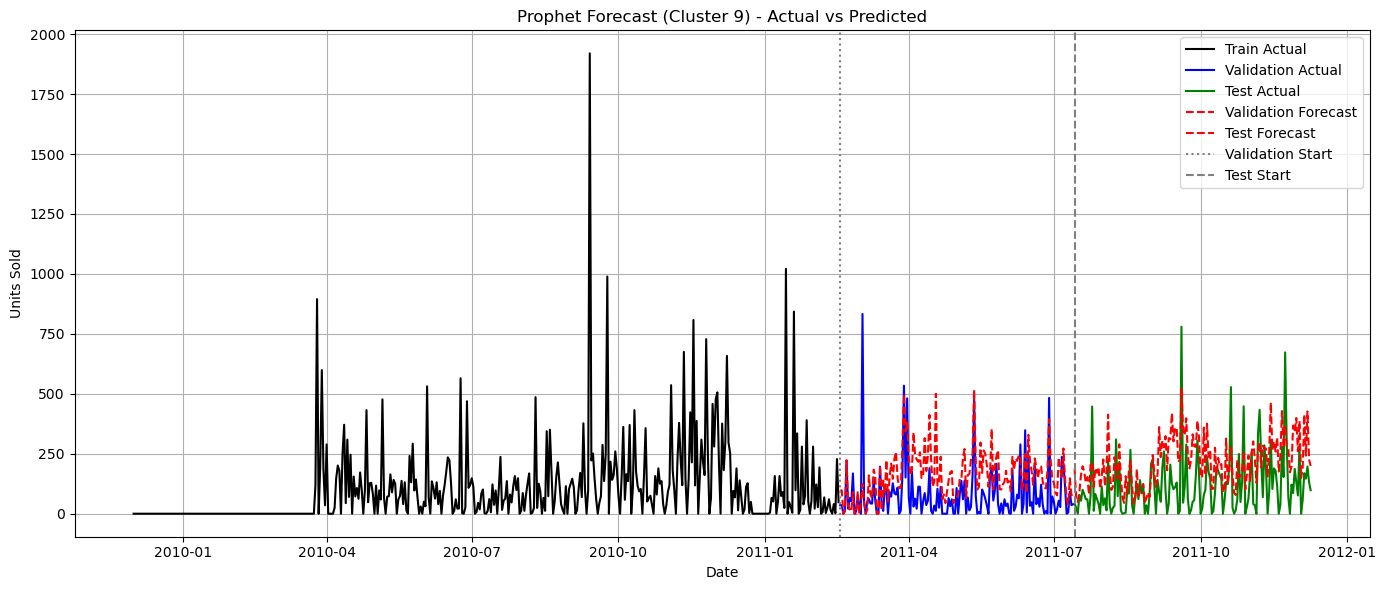


🔍 Processing Cluster 10


23:55:36 - cmdstanpy - INFO - Chain [1] start processing
23:55:36 - cmdstanpy - INFO - Chain [1] done processing
23:55:37 - cmdstanpy - INFO - Chain [1] start processing
23:55:37 - cmdstanpy - INFO - Chain [1] done processing
23:55:37 - cmdstanpy - INFO - Chain [1] start processing
23:55:37 - cmdstanpy - INFO - Chain [1] done processing
23:55:38 - cmdstanpy - INFO - Chain [1] start processing
23:55:38 - cmdstanpy - INFO - Chain [1] done processing
23:55:38 - cmdstanpy - INFO - Chain [1] start processing
23:55:38 - cmdstanpy - INFO - Chain [1] done processing
23:55:39 - cmdstanpy - INFO - Chain [1] start processing
23:55:39 - cmdstanpy - INFO - Chain [1] done processing
23:55:39 - cmdstanpy - INFO - Chain [1] start processing
23:55:40 - cmdstanpy - INFO - Chain [1] done processing
23:55:40 - cmdstanpy - INFO - Chain [1] start processing
23:55:40 - cmdstanpy - INFO - Chain [1] done processing
23:55:41 - cmdstanpy - INFO - Chain [1] start processing
23:55:41 - cmdstanpy - INFO - Chain [1]


✅ Best Parameters for Cluster 10: changepoint_prior_scale=0.05, seasonality_prior_scale=0.1, fourier_order=3
📉 Best SMAPE on Validation Set: 26.83%


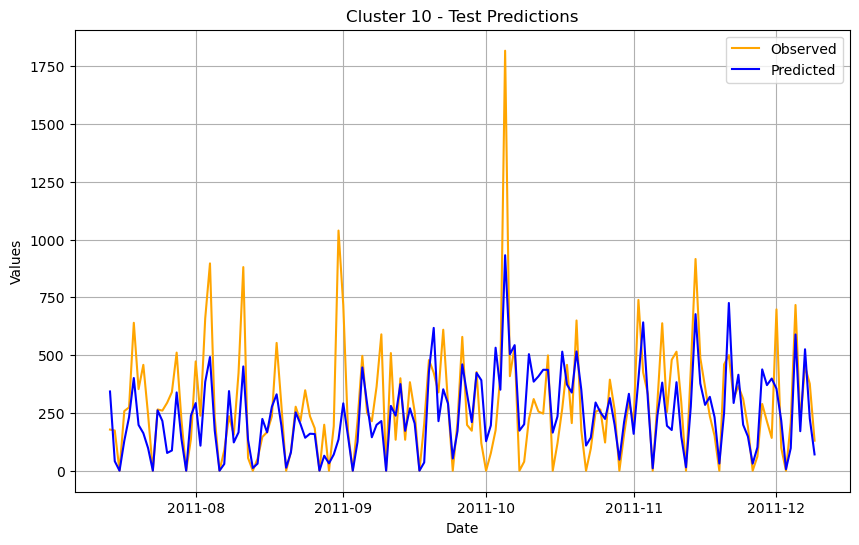

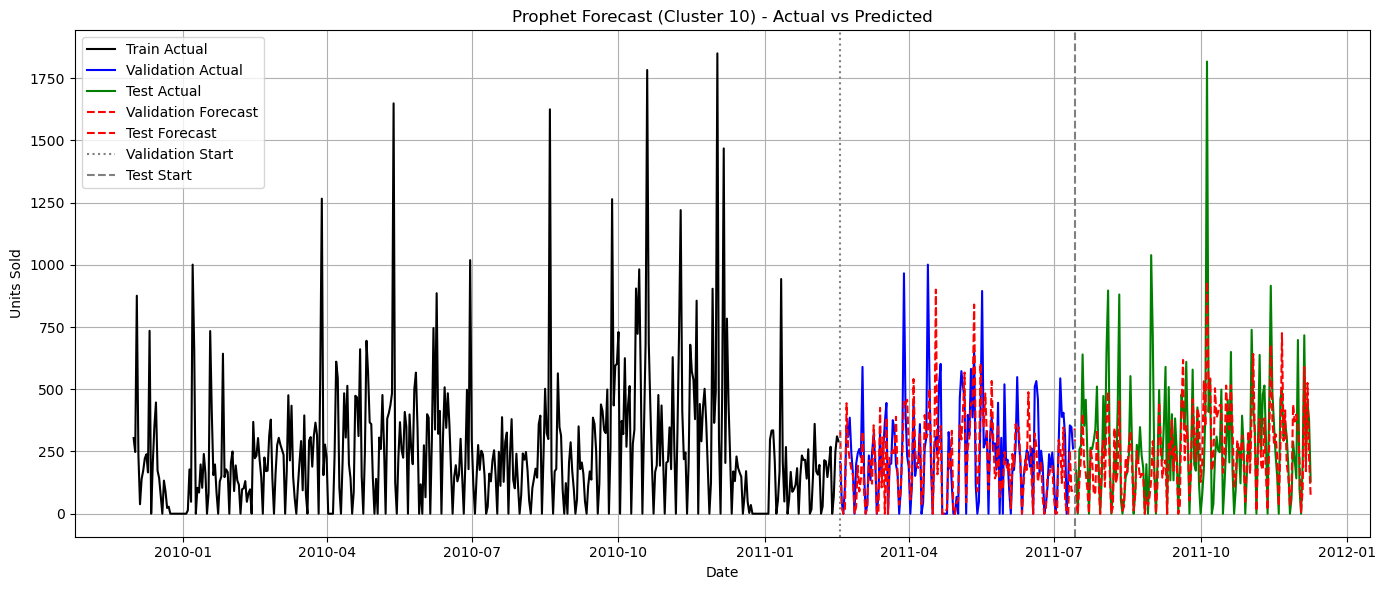


🔍 Processing Cluster 11


23:56:21 - cmdstanpy - INFO - Chain [1] start processing
23:56:21 - cmdstanpy - INFO - Chain [1] done processing
23:56:21 - cmdstanpy - INFO - Chain [1] start processing
23:56:21 - cmdstanpy - INFO - Chain [1] done processing
23:56:22 - cmdstanpy - INFO - Chain [1] start processing
23:56:22 - cmdstanpy - INFO - Chain [1] done processing
23:56:22 - cmdstanpy - INFO - Chain [1] start processing
23:56:22 - cmdstanpy - INFO - Chain [1] done processing
23:56:23 - cmdstanpy - INFO - Chain [1] start processing
23:56:23 - cmdstanpy - INFO - Chain [1] done processing
23:56:23 - cmdstanpy - INFO - Chain [1] start processing
23:56:23 - cmdstanpy - INFO - Chain [1] done processing
23:56:24 - cmdstanpy - INFO - Chain [1] start processing
23:56:24 - cmdstanpy - INFO - Chain [1] done processing
23:56:24 - cmdstanpy - INFO - Chain [1] start processing
23:56:25 - cmdstanpy - INFO - Chain [1] done processing
23:56:25 - cmdstanpy - INFO - Chain [1] start processing
23:56:25 - cmdstanpy - INFO - Chain [1]


✅ Best Parameters for Cluster 11: changepoint_prior_scale=0.2, seasonality_prior_scale=0.05, fourier_order=3
📉 Best SMAPE on Validation Set: 43.05%


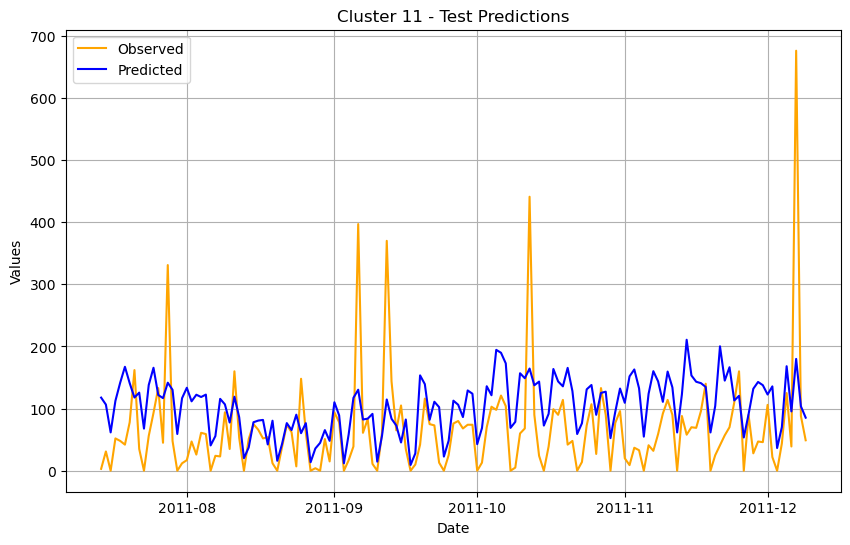

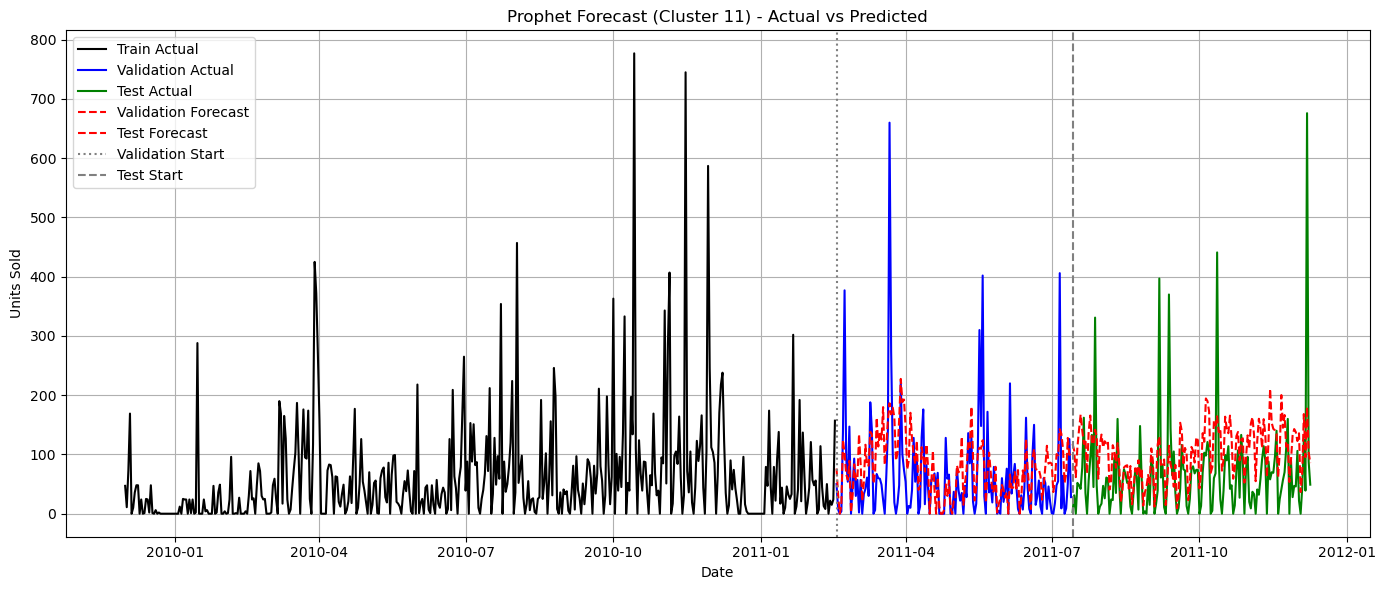


🔍 Processing Cluster 12


23:57:04 - cmdstanpy - INFO - Chain [1] start processing
23:57:04 - cmdstanpy - INFO - Chain [1] done processing
23:57:04 - cmdstanpy - INFO - Chain [1] start processing
23:57:04 - cmdstanpy - INFO - Chain [1] done processing
23:57:05 - cmdstanpy - INFO - Chain [1] start processing
23:57:05 - cmdstanpy - INFO - Chain [1] done processing
23:57:05 - cmdstanpy - INFO - Chain [1] start processing
23:57:05 - cmdstanpy - INFO - Chain [1] done processing
23:57:06 - cmdstanpy - INFO - Chain [1] start processing
23:57:06 - cmdstanpy - INFO - Chain [1] done processing
23:57:06 - cmdstanpy - INFO - Chain [1] start processing
23:57:06 - cmdstanpy - INFO - Chain [1] done processing
23:57:07 - cmdstanpy - INFO - Chain [1] start processing
23:57:07 - cmdstanpy - INFO - Chain [1] done processing
23:57:07 - cmdstanpy - INFO - Chain [1] start processing
23:57:08 - cmdstanpy - INFO - Chain [1] done processing
23:57:08 - cmdstanpy - INFO - Chain [1] start processing
23:57:08 - cmdstanpy - INFO - Chain [1]


✅ Best Parameters for Cluster 12: changepoint_prior_scale=0.05, seasonality_prior_scale=0.05, fourier_order=3
📉 Best SMAPE on Validation Set: 39.10%


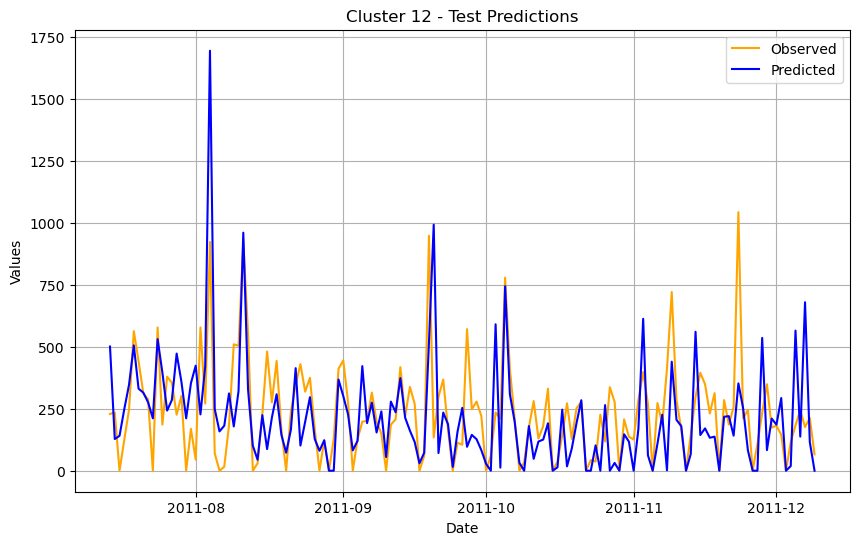

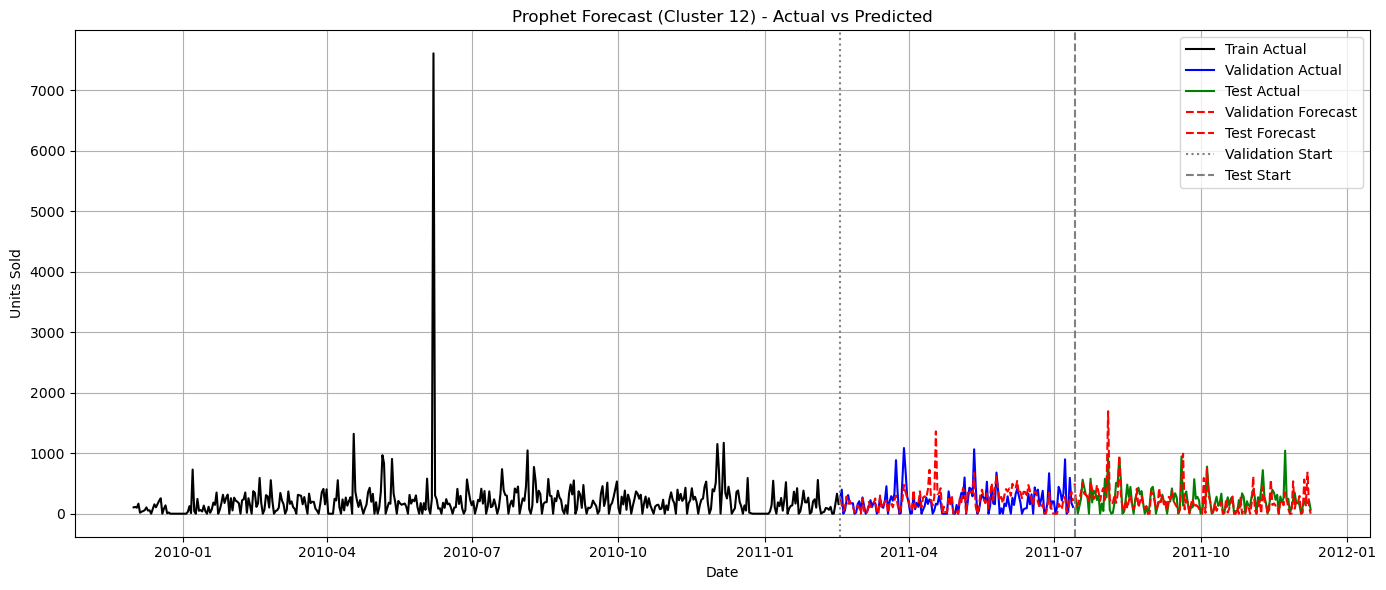

In [18]:
for cluster in clusters:
    print(f"\n🔍 Processing Cluster {cluster}")
    cluster_df = total_df[total_df['K-Means_Cluster'] == cluster].copy()
    cluster_df = cluster_df[['ds', 'y'] + regressors].sort_values('ds')

    train_size = int(len(cluster_df) * 0.6)
    val_size = int(len(cluster_df) * 0.2)

    train_data = cluster_df.iloc[:train_size]
    validation_data = cluster_df.iloc[train_size:train_size + val_size]
    test_data = cluster_df.iloc[train_size + val_size:]

    best_smape = float("inf")
    best_params = None
    best_model = None

    for cp_scale, seas_scale, fourier in product(param_grid["changepoint_prior_scale"],
                                                 param_grid["seasonality_prior_scale"],
                                                 param_grid["fourier_order"]):
        model = Prophet(yearly_seasonality=True,
                        weekly_seasonality=True,
                        daily_seasonality=False,
                        changepoint_prior_scale=cp_scale,
                        seasonality_prior_scale=seas_scale)

        for reg in regressors:
            model.add_regressor(reg)

        model.fit(train_data)

        future_val = validation_data[['ds'] + regressors]
        forecast_val = model.predict(future_val)
        forecast_val['yhat'] = np.clip(forecast_val['yhat'], 0, clip_threshold)

        smape_score = calculate_smape(validation_data['y'].values, forecast_val['yhat'].values)

        if smape_score < best_smape:
            best_smape = smape_score
            best_params = (cp_scale, seas_scale, fourier)
            best_model = model

    print(f"\n✅ Best Parameters for Cluster {cluster}: changepoint_prior_scale={best_params[0]}, "
          f"seasonality_prior_scale={best_params[1]}, fourier_order={best_params[2]}")
    print(f"📉 Best SMAPE on Validation Set: {best_smape:.2f}%")

    best_test_forecast = best_model.predict(test_data[['ds'] + regressors])
    best_test_forecast['yhat'] = np.clip(best_test_forecast['yhat'], 0, clip_threshold)
    best_validation_forecast = best_model.predict(validation_data[['ds'] + regressors])
    best_validation_forecast['yhat'] = np.clip(best_validation_forecast['yhat'], 0, clip_threshold)

    # Plot test predictions
    plt.figure(figsize=(10, 6))
    plt.plot(pd.to_datetime(test_data['ds']), test_data['y'], label='Observed', color='orange')
    plt.plot(pd.to_datetime(test_data['ds']), best_test_forecast['yhat'], label='Predicted', color='blue')
    plt.xlabel('Date')
    plt.ylabel('Values')
    plt.title(f'Cluster {cluster} - Test Predictions')
    plt.legend()
    plt.grid(True)
    plt.show()

    # Plot full timeline with forecasts
    plt.figure(figsize=(14, 6))
    plt.plot(train_data['ds'], train_data['y'], label='Train Actual', color='black')
    plt.plot(validation_data['ds'], validation_data['y'], label='Validation Actual', color='blue')
    plt.plot(test_data['ds'], test_data['y'], label='Test Actual', color='green')

    plt.plot(best_validation_forecast['ds'], best_validation_forecast['yhat'], label='Validation Forecast', color='red', linestyle='--')
    plt.plot(best_test_forecast['ds'], best_test_forecast['yhat'], label='Test Forecast', color='red', linestyle='--')

    plt.axvline(x=validation_data['ds'].min(), color='gray', linestyle=':', label='Validation Start')
    plt.axvline(x=test_data['ds'].min(), color='gray', linestyle='--', label='Test Start')

    plt.title(f'Prophet Forecast (Cluster {cluster}) - Actual vs Predicted')
    plt.xlabel('Date')
    plt.ylabel('Units Sold')
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.show()